In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def close(x):
    return x["Close"]

In [3]:
AAPL = pd.read_csv(
        "AAPL.csv",
        index_col="Date",
        parse_dates=True,
        infer_datetime_format=True
)

AMZN = pd.read_csv(
        "AMZN.csv",
        index_col="Date",
        parse_dates=True,
        infer_datetime_format=True
)

GME = pd.read_csv(
        "GME.csv",
        index_col="Date",
        parse_dates=True,
        infer_datetime_format=True
)

GOOG = pd.read_csv(
        "GOOG.csv",
        index_col="Date",
        parse_dates=True,
        infer_datetime_format=True
)

NFLX = pd.read_csv(
        "NFLX.csv",
        index_col="Date",
        parse_dates=True,
        infer_datetime_format=True
)

SPY = pd.read_csv(
        "SPY.csv",
        index_col="Date",
        parse_dates=True,
        infer_datetime_format=True
)

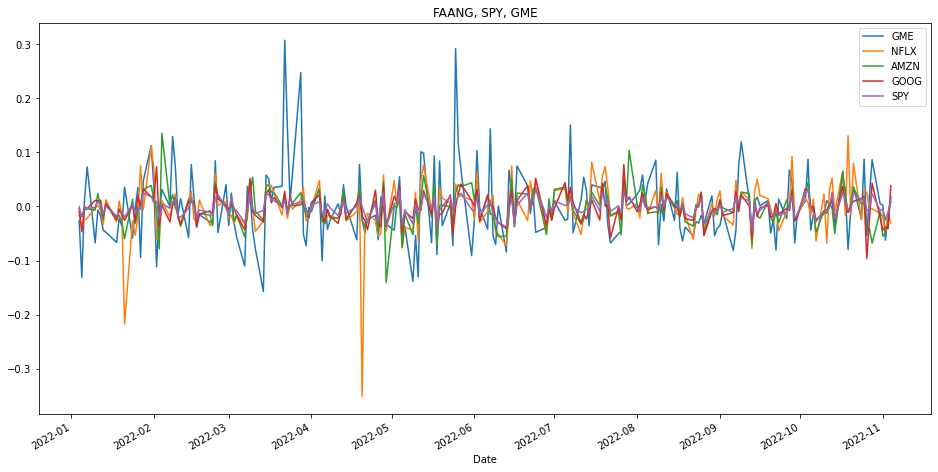

In [16]:
GME["Adj Close"].pct_change().plot(label="GME", figsize=(16,8), title="FAANG, SPY, GME")
NFLX["Adj Close"].pct_change().plot(label="NFLX")
AMZN["Adj Close"].pct_change().plot(label="AMZN")
GOOG["Adj Close"].pct_change().plot(label="GOOG")
SPY["Adj Close"].pct_change().plot(label="SPY")
plt.legend()

In [5]:
daily_pct_change = GME["Adj Close"].pct_change()
daily_pct_change.fillna(0, inplace=True)
cumprod_daily_pct_change = (1 + daily_pct_change).cumprod()

<AxesSubplot:xlabel='Date'>

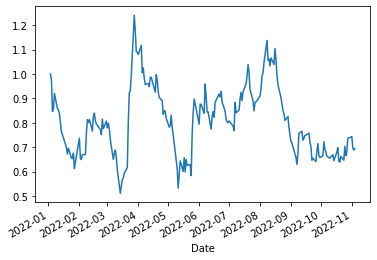

In [6]:
cumprod_daily_pct_change.plot()

In [13]:
import datetime
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr

# fetch multiple asset data
def getMultiAssetData(ticketList, date_from, date_to):
    def getData(ticker):
        data = pdr.DataReader(ticker, 'yahoo', date_from, date_to)
        return data
    datas = map(getData, tickerList)
    return pd.concat(datas, keys=tickerList, names=['Ticker', 'Date'])

date_from = datetime.date(2022, 1, 1)
date_to = datetime.date(2022, 11, 7)
tickerList = ['AAPL', 'AMZN', 'GME', 'META', 'GOOG', 'SPY', 'MSFT']
multiData = getMultiAssetData(tickerList, date_from, date_to)
df = multiData.copy()

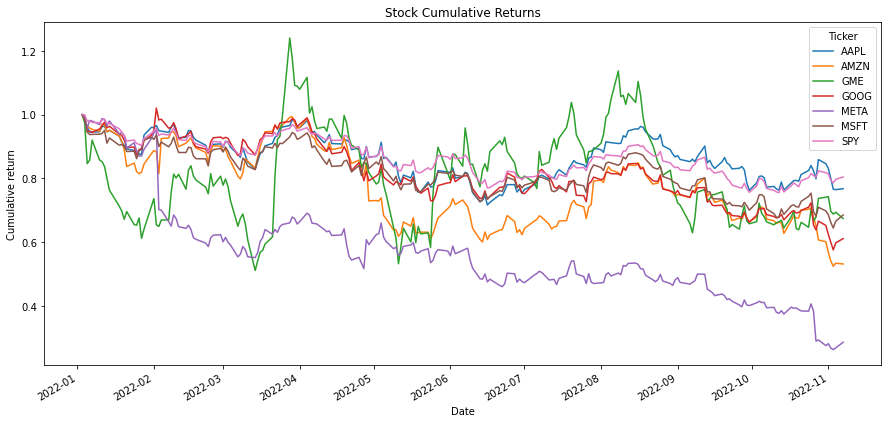

In [14]:
# use pivot to reshape DataFrame with only Adj Close
adjClosePrice = df[['Adj Close']]
adjClosePrice = adjClosePrice.reset_index()
adjClosePriceTable = adjClosePrice.pivot(index='Date', columns='Ticker', values='Adj Close')
adjClosePriceTable.tail()

# calculate daily return and cumulative return from daily return
daily_pct_change = adjClosePriceTable.pct_change()
daily_pct_change.fillna(0, inplace=True)
cumprod_daily_pct_change = (1 + daily_pct_change).cumprod()

fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
cumprod_daily_pct_change.plot(ax=ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative return')
ax1.set_title('Stock Cumulative Returns')
plt.show()